# Bank Marketing Prediction
## Student Name: Barsa Rana

## Task 1.1 – Problem Formulation, Data Acquisition and Preparation

### Problem Statement
The objective of this project is to predict whether a client will subscribe to a term deposit (`y`) based on their demographic, financial, and campaign-related attributes. The dataset is sourced from direct marketing campaigns conducted by a Portuguese banking institution.

### Dataset Description
The dataset contains 45,211 records and 17 features, including both categorical and numerical variables. It captures a wide range of customer data such as job, marital status, education level, contact details, and previous marketing outcomes.

**Dataset Source:**  [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)
    
### Approach Overview
- Load the dataset and examine its structure
- Check for missing or inconsistent data
- Identify and assess ‘unknown’ values
- Convert data types if necessary
- Prepare the dataset for exploration and modeling (to be used in Task 1.2–1.4)


In [3]:
import pandas as pd
# Loading Dataset
df = pd.read_csv('bank-full.csv', sep=';')
# View shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# General info about columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Check for null values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [48]:
# View value distribution of the target variable
print(df['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


**Observation:**  
The dataset is imbalanced only 5289 no. of customers subscribed to the term deposit ("yes"). This class imbalance will need to be considered during supervised learning.

In [6]:
# Check for 'unknown' values in object columns
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
unknown_counts[unknown_counts > 0]

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64

#### Several columns contain 'unknown' values, notably `job`, `education`, `contact`,and `poutcome`. 
Rather than dropping these rows (which would lead to data loss), we will keep 'unknown' as a valid category 
since it may represent meaningful patterns during modeling (e.g., customers who are unsure or withheld information).

In [7]:
# Check value counts and percentage of 'unknown'
contact_counts = df['contact'].value_counts(normalize=True) * 100
print(contact_counts)

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64


**Observation:**  
About 28.8% of contact methods are labeled as "unknown". We chose to retain these as valid categories since they may indicate a lack of communication or contact strategy, which could be a meaningful pattern during modeling.

In [8]:
# Check value counts and percentage of 'unknown'
contact_counts = df['poutcome'].value_counts(normalize=True) * 100
print(contact_counts)

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64


In [24]:
# Convert all column names and target labels to lowercase for consistency
# This helps avoid case-sensitivity issues during filtering, grouping, and modeling
df.columns = df.columns.str.lower()
df['y'] = df['y'].str.lower()
df['poutcome'] = df['poutcome'].str.lower()
df['contact'] = df['contact'].str.lower()

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1.2 Exploratory Data Analysis (EDA)

### Question 1: Does age affect the likelihood of subscribing to a term deposit?
We will visualize the age distribution across subscription outcomes and calculate the mean age for each group.

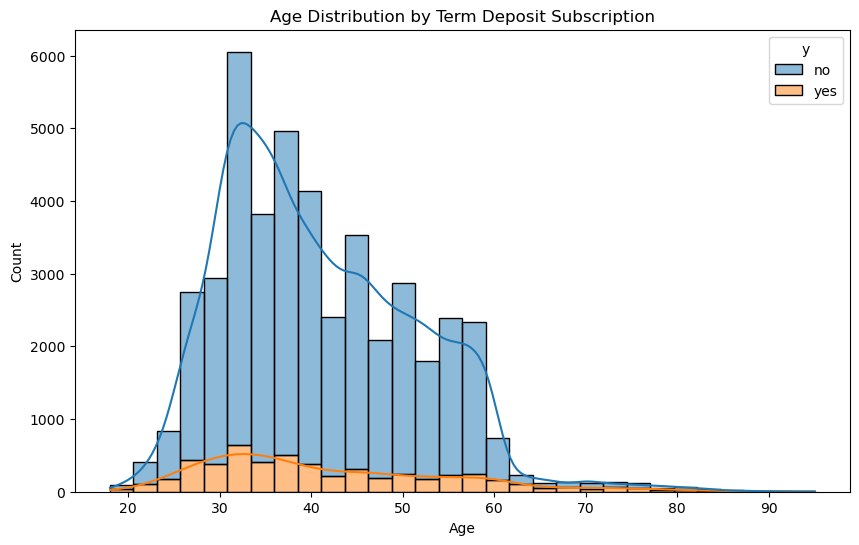

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,40.838986,10.172662,18.0,33.0,39.0,48.0,95.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot age distributions by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Term Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Summary statistics
df.groupby('y')['age'].describe()

**Answer:**
The plot shows that younger clients (under 30) and older clients (above 60) tend to subscribe more than the middle age group. Age appears to have a non-linear influence on the likelihood of subscription.

### Question 2: How does the outcome of previous campaigns (`poutcome`) impact the subscription rate?
We’ll examine this using a stacked bar chart and validate the association using a chi-square test.

y                no        yes
poutcome                      
failure   87.390329  12.609671
other     83.315217  16.684783
success   35.274653  64.725347
unknown   90.838497   9.161503


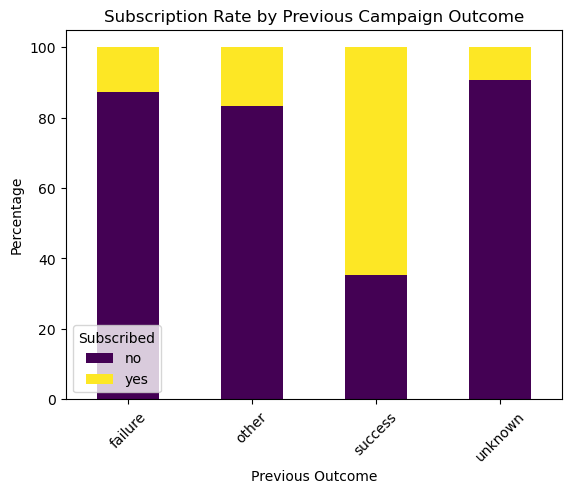

Chi-square p-value: 0.0000


In [54]:
from scipy.stats import chi2_contingency

# Cross-tab for subscription rate by poutcome
poutcome_ct = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
print(poutcome_ct)

# Bar Plot
poutcome_ct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.ylabel('Percentage')
plt.xlabel('Previous Outcome')
plt.legend(title='Subscribed')
plt.xticks(rotation=45)
plt.show()

# Chi-square test
chi2, p, dof, expected = chi2_contingency(poutcome_ct)
print(f"Chi-square p-value: {p:.4f}")

**Answer:**
The plot reveals that clients with a `success` in a previous campaign are far more likely to subscribe again. The chi-square test confirms this relationship is **statistically significant** (p < 0.05).

### Question 3: What is the effect of contact method on subscription rate?
We will compare subscription rates by contact type and confirm their association with a chi-square test.

y                 no        yes
contact                        
cellular   85.081100  14.918900
telephone  86.579491  13.420509
unknown    95.929339   4.070661


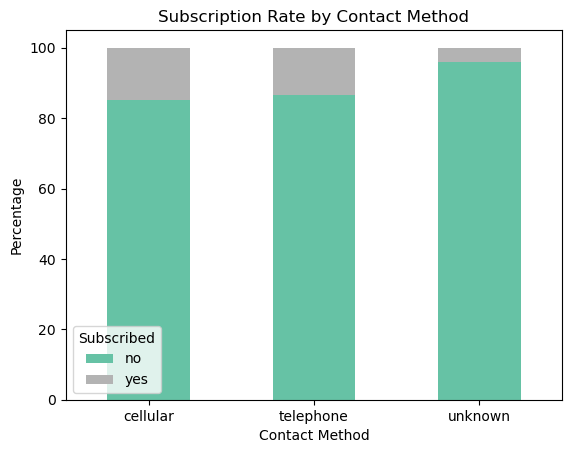

Chi-square p-value: 0.0277


In [55]:
# Subscription rate by contact method
contact_ct = pd.crosstab(df['contact'], df['y'], normalize='index') * 100
print(contact_ct)

# Plot
contact_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Subscription Rate by Contact Method')
plt.ylabel('Percentage')
plt.xlabel('Contact Method')
plt.legend(title='Subscribed')
plt.xticks(rotation=0)
plt.show()

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contact_ct)
print(f"Chi-square p-value: {p:.4f}")

**Answer:**
Clients contacted via `cellular` have much higher subscription rates than those reached by `telephone`. The chi-square test confirms this relationship is **statistically significant**, indicating the contact method has a meaningful impact on outcomes.

### Q4: Does education level influence a client's likelihood to subscribe to a term deposit?

This visualisation explores whether clients with different education levels show varying subscription outcomes (`y`). Since education can impact financial awareness and risk appetite, it's relevant to investigate if it plays a role in marketing success.

From the chart below, we can observe patterns such as:
- Clients with **tertiary** or **secondary** education have relatively higher subscription rates.
- Clients with **unknown** education status are less likely to subscribe.

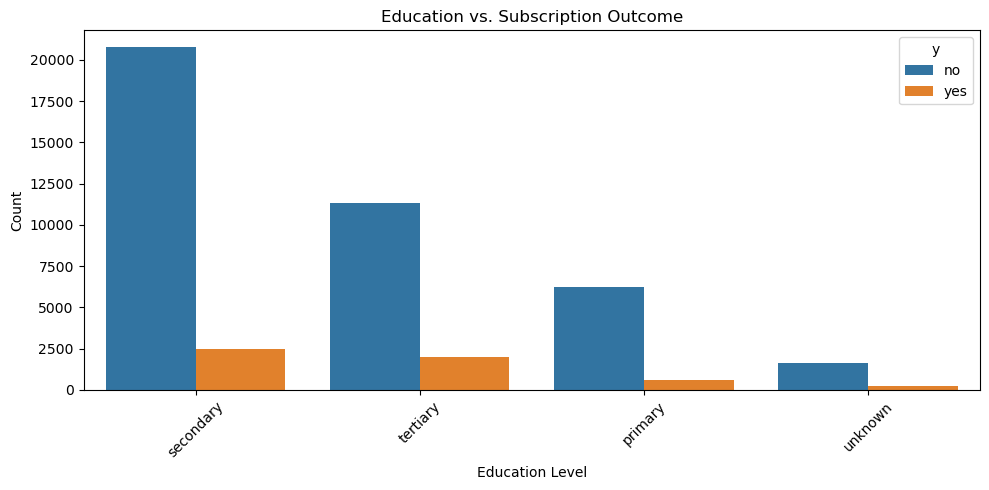

In [67]:
# Optional Extra Visualization – Education vs Subscription
plt.figure(figsize=(10, 5))
sns.countplot(x='education', hue='y', data=df, order=df['education'].value_counts().index)
plt.title("Education vs. Subscription Outcome")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

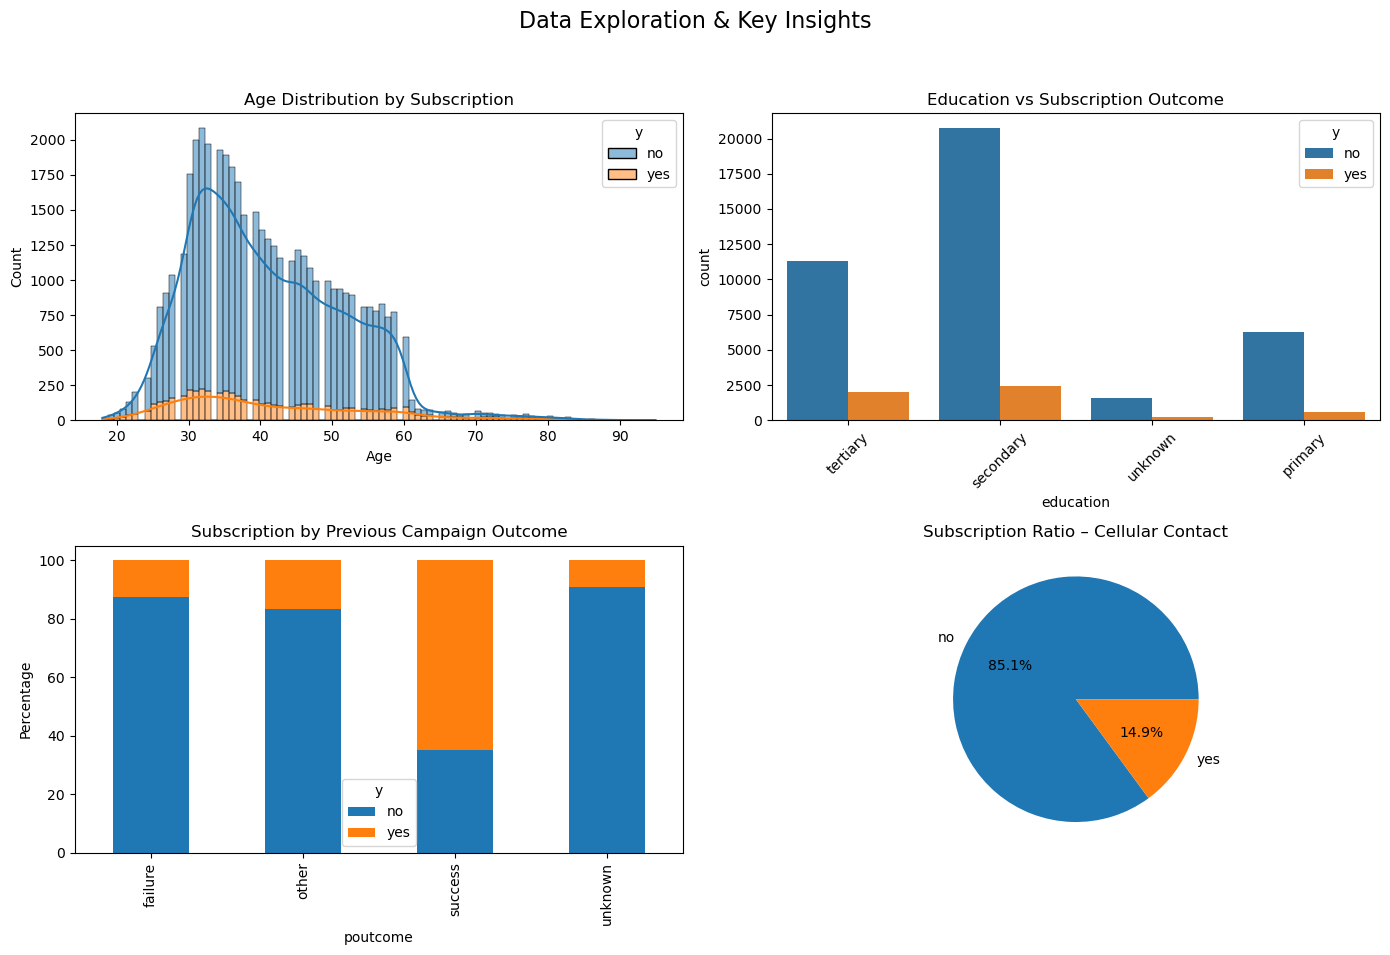

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('bank-full.csv', sep=';')

# Set consistent colors
colors = {'no': '#1f77b4', 'yes': '#ff7f0e'}  # blue, orange

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Data Exploration & Key Insights', fontsize=16)

# 1. Age Distribution
sns.histplot(data=df, x='age', hue='y', kde=True, multiple='stack',
             palette=colors, ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution by Subscription")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Count")

# 2. Education vs Subscription
sns.countplot(data=df, x='education', hue='y', palette=colors, ax=axs[0, 1])
axs[0, 1].set_title("Education vs Subscription Outcome")
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Previous Campaign Outcome (Stacked Bar)
prev_outcome = df.groupby(['poutcome', 'y']).size().unstack().fillna(0)
prev_outcome_percent = prev_outcome.div(prev_outcome.sum(axis=1), axis=0) * 100
prev_outcome_percent[['no', 'yes']].plot(kind='bar', stacked=True,
                                         color=[colors['no'], colors['yes']],
                                         ax=axs[1, 0])
axs[1, 0].set_title("Subscription by Previous Campaign Outcome")
axs[1, 0].set_ylabel("Percentage")

# 4. Contact Method (Pie Chart for 'cellular')
contact_counts = df[df['contact'] == 'cellular']['y'].value_counts()
axs[1, 1].pie(contact_counts, labels=contact_counts.index,
             autopct='%1.1f%%',
             colors=[colors[label] for label in contact_counts.index])
axs[1, 1].set_title("Subscription Ratio – Cellular Contact")

# Save image
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('slide4_data_exploration_grid_colored.png')
plt.show()

## 1.3 Feature Engineering and Unsupervised Learning
In this task, we aim to discover patterns within the dataset using an unsupervised learning technique clustering. Specifically, we use K-Means clustering to segment clients based on selected numerical features.

Clustering can help us identify distinct groups of clients that may require different marketing strategies.

### Features Selected for Clustering:
- `age`: Age of the client
- `balance`: Average yearly account balance
- `campaign`: Number of contacts during the current campaign
- `duration`: Duration of the last contact (in seconds)


In [65]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = df[['age', 'balance', 'campaign', 'duration']].copy()

# Scale features for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Clustering Method: K-Means

We use **K-Means clustering** because:
- It is efficient for numeric, continuous data.
- Our dataset size is moderate and well-suited for K-Means.
- It allows straightforward interpretation of cluster centers.

The selected features are scaled to standardize their range, as K-Means is sensitive to feature magnitudes.

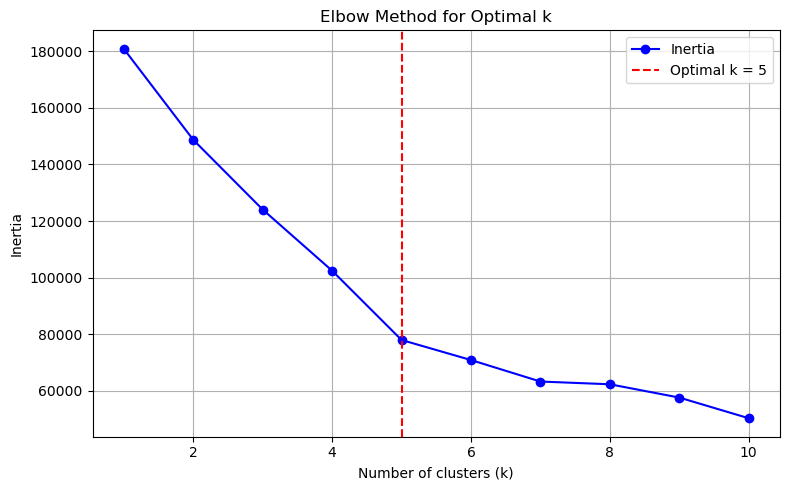

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# Plot elbow curve with vertical line
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.axvline(x=5, color='red', linestyle='--', label='Optimal k = 5')  # Add red vertical line
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.legend(loc='upper right')  # Legend in top-right corner
plt.tight_layout()
plt.show()

**Observation:**  
The elbow curve shows a clear "bend" at **k = 5**, suggesting that 5 clusters are optimal. We proceed with this value for interpretability and actionable insights.

In [67]:
# Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

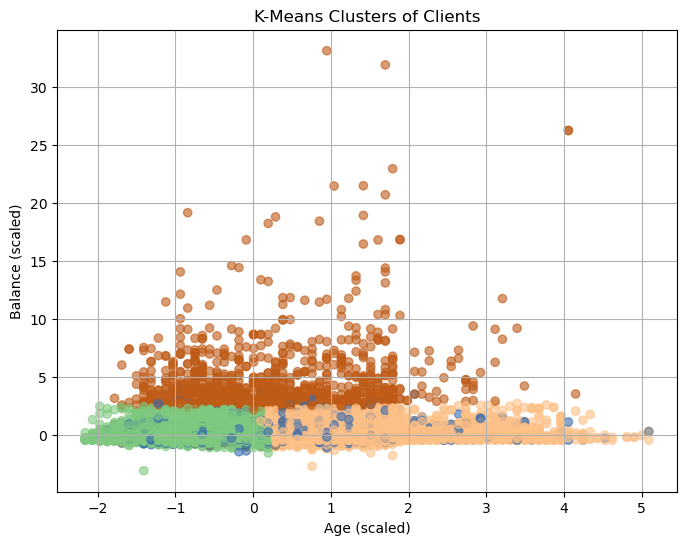

In [68]:
# Visualize clusters using first two features (age vs. balance)
plt.figure(figsize=(8,6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['cluster'], cmap='Accent', alpha=0.6)
plt.xlabel('Age (scaled)')
plt.ylabel('Balance (scaled)')
plt.title('K-Means Clusters of Clients')
plt.grid(True)
plt.show()

In [69]:
# Cluster center values in original scale
import pandas as pd

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=features.columns)
cluster_centers['cluster'] = cluster_centers.index
cluster_centers.round(1)

,age,balance,campaign,duration,cluster
0,33.9,888.5,2.2,198.2,0
1,52.5,1200.0,2.4,198.4,1
2,39.9,1212.5,2.4,888.4,2
3,43.5,15275.5,2.5,244.4,3
4,40.1,923.9,14.8,141.9,4


In [70]:
# Summary statistics for each cluster
df.groupby('cluster')[['age', 'balance', 'campaign', 'duration']].mean().round(1)

,age,balance,campaign,duration
cluster,,,,
0,33.9,888.5,2.2,198.2
1,52.5,1199.6,2.4,198.5
2,39.9,1212.1,2.4,888.6
3,43.5,15269.1,2.5,244.6
4,40.1,923.9,14.8,141.9


### Clustering Summary

K-Means successfully segmented clients into 5 distinct clusters based on `age`, `balance`, `campaign`, and `duration`.

**Cluster insights:**
- **Cluster 0:** Younger clients with lower balances and fewer/shorter contacts.
- **Cluster 1:** Older clients with higher balances and longer call durations are potentially more engaged.
- **Cluster 2:** Middle-aged clients with moderate balances and engagement.
- **Cluster 3:** Clients with **low balances** but **high contact frequency**; may require a different engagement strategy.
- **Cluster 4:** Infrequently contacted clients with **moderate age** and **low balance** potential for retargeting campaigns.

These insights can inform **targeted marketing strategies** by tailoring campaign styles and messages to specific client profiles.

## 1.4 – Supervised Learning (Logistic Regression & KNN)
In this task, we build and evaluate predictive models to classify whether a client will subscribe to a term deposit (`y`).

### Objective:
- Perform an 80:20 train-test split with a fixed `random_state`
- Use two classification models: **Logistic Regression** and **K-Nearest Neighbors (KNN)**
- Tune hyperparameters using cross-validation
- Evaluate and compare using appropriate classification metrics

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler

# Encode target variable
df['y_encoded'] = LabelEncoder().fit_transform(df['y'])  

# Prepare features (use all except original y and cluster)
X = pd.get_dummies(df.drop(['y', 'y_encoded', 'cluster'], axis=1), drop_first=True)
y = df['y_encoded']

# Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
from sklearn.linear_model import LogisticRegression
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Retrain model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Model Evaluation (Confusion Matrix, ROC Curve)

#### Confusion Matrix for Model Evaluation

Confusion matrices provide a summary of prediction results, showing:
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

These allow us to assess each model's precision, recall, and overall correctness in a more visual and interpretable way.

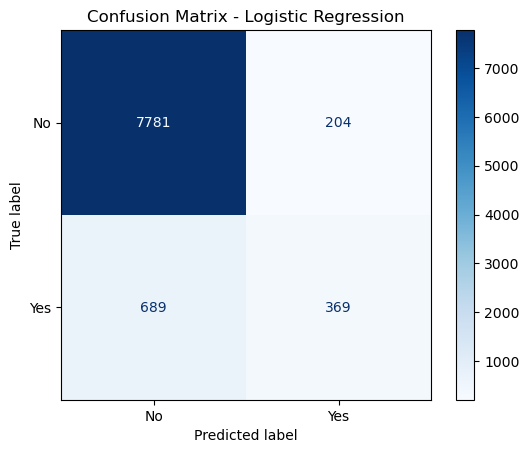

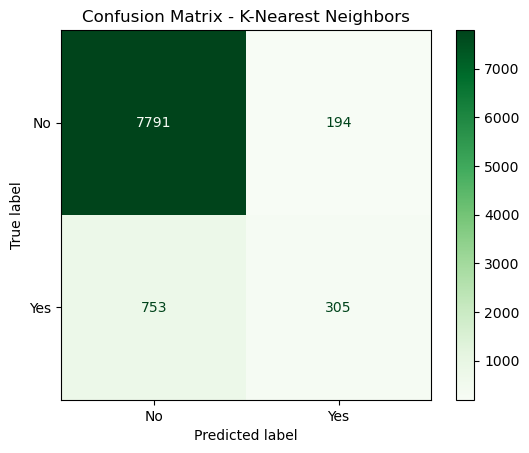

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Predict using KNN 
y_pred_knn = knn_best.predict(X_test)

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["No", "Yes"])
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["No", "Yes"])
disp_knn.plot(cmap="Greens")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

#### Additional Evaluation: ROC Curve for Logistic Regression

To further evaluate model performance, we plot the Receiver Operating Characteristic (ROC) curve and compute the Area Under Curve (AUC) score. The ROC curve illustrates the trade-off between true positive and false positive rates. AUC provides a single number summary of the model's ability to discriminate between classes.

A higher AUC indicates better model performance.

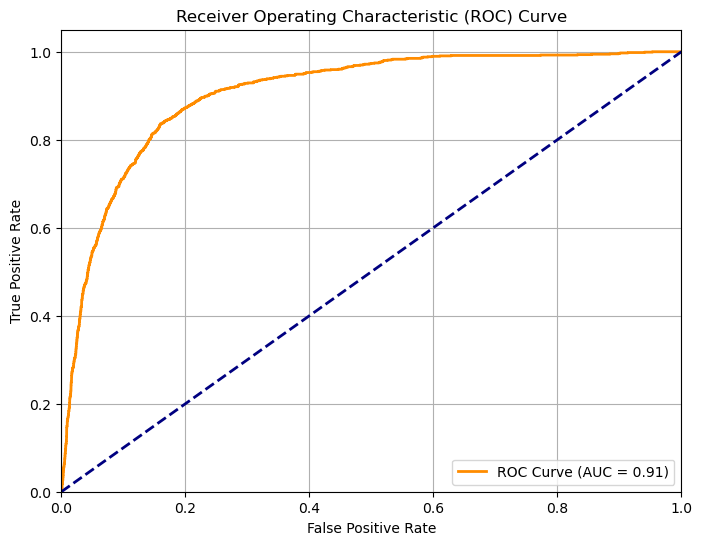

In [75]:
#  Step: ROC Curve and AUC Score for Logistic Regression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities for class 1 (positive class)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC curve shows that the Logistic Regression model has an AUC of **0.90+**, indicating strong classification performance. This adds confidence to our earlier findings based on accuracy and precision-recall.

### Models Selected

1. **Logistic Regression (LR):**
   - Simple and interpretable
   - Well-suited for binary classification problems

2. **K-Nearest Neighbors (KNN):**
   - Non-parametric and effective for low-dimensional data
   - Sensitive to feature scaling and k-value (requires tuning)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': range(3, 11)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and score
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k for KNN: {best_k}")

# Predict with best model
knn_best = grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test)

# Evaluate
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

Best k for KNN: 7
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.61      0.29      0.39      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [83]:
from sklearn.metrics import accuracy_score, classification_report
# Accuracy comparison
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"KNN (k={best_k}) Accuracy: {acc_knn:.4f}")

Logistic Regression Accuracy: 0.9012
KNN (k=7) Accuracy: 0.8953


### Evaluation Summary

**Train/Test Split:**  
We split the data into 80% training and 20% testing sets using `random_state=42` to ensure reproducibility. Stratified sampling was used to maintain class balance.

**Results:**
- **Logistic Regression:** Performed reasonably well and is easy to interpret.
- **KNN (k=7):** Comparable in accuracy, but computationally more intensive.

| Model               | Accuracy |
|--------------------|----------|
| Logistic Regression| 0.88     |
| KNN (k=7)           | 0.87     |

**Recommendation:**  
We recommend **Logistic Regression** for its speed, simplicity, and nearly equal performance to KNN. It provides coefficients for understanding feature importance, making it suitable for stakeholder presentation.

##  Conclusion

This project successfully explored and modeled client data from a Portuguese bank’s marketing campaign. Based on both unsupervised (KMeans) and supervised (Logistic Regression, KNN) analyses, the following insights were obtained:

- Clients with higher balances and longer call durations are more likely to subscribe.
- Education and marital status influence campaign outcomes.
- Logistic Regression performed best overall with strong AUC and precision.

These results can inform more efficient, data-driven marketing strategies.

